## Using Monte Carlo to get simulated data
#### done in numpy first

In [3]:
# import libraries we need
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [162]:
# set parameters
dt = 2.34e-9
tmax = 400e-9
Nbin = 215
R = 1/(20*Nbin)
Nco = 1/R*10
n = 0

'''
dt -> time bin size in ns
tmax -> max time delay in ns
Nbin -> number of bins
R -> co-detection rate per bin
Nco -> total detections
n -> number of count
'''

'\ndt -> time bin size in ns\ntmax -> max time delay in ns\nNbin -> number of bins\nR -> co-detection rate per bin\nNco -> total detections\nn -> number of count\n'

In [163]:
# build up the probability function
egR = 20e6
geR = 20e6
emR = 10e6
mgR = 7e6
lambda1 = egR + geR
lambda2 = mgR + (emR*geR/lambda1)
a = lambda2/mgR - 1
g2_0 = 0.5 # we assume
r_bg = 1 - np.sqrt(1-g2_0)
n0 = 0

def P(n):
    if n.any()==0:
        P = R*r_bg + R * (1-r_bg) * (1 - (1+a)*np.exp((-0.25)*dt*lambda1) + a*np.exp((-0.25)*dt*lambda2) )
    else:
        P = R*r_bg + R * (1-r_bg) * \
        (1 - (1+a)*np.exp((-1)*abs(n-n0+0.5)*dt*lambda1) + a*np.exp((-1)*abs(n-n0+0.5)*dt*lambda2) )
    return P

In [164]:
# setup events
p1 = n
p2 = []
binlist = []
p=P(np.arange(Nbin))
p /= np.sum(p)

for i in np.arange(Nbin):
    binlist.append(i)

for i in np.arange(Nco):
    p2det = np.random.choice(np.arange(Nbin),p=p)
    p2.append(p2det)
p2 = np.stack(p2)

(array([ 69.,  80.,  95., 121., 124., 148., 160., 160., 172., 180., 167.,
        160., 176., 180., 213., 201., 199., 188., 236., 233., 197., 209.,
        217., 197., 230., 206., 199., 229., 223., 249., 200., 236., 215.,
        202., 232., 228., 212., 232., 241., 234., 236., 244., 239., 222.,
        247., 221., 218., 192., 207., 225., 224., 214., 211., 192., 232.,
        225., 217., 210., 212., 232., 216., 217., 212., 195., 189., 219.,
        221., 228., 184., 190., 221., 221., 227., 210., 195., 218., 167.,
        201., 188., 189., 210., 204., 182., 192., 210., 197., 201., 184.,
        216., 212., 191., 213., 209., 207., 218., 226., 199., 214., 188.,
        209., 194., 231., 185., 212., 184., 181., 196., 192., 196., 208.,
        189., 201., 215., 212., 191., 217., 191., 202., 204., 210., 197.,
        191., 183., 185., 196., 221., 191., 196., 193., 205., 223., 188.,
        205., 195., 201., 192., 197., 210., 188., 187., 216., 183., 209.,
        200., 218., 197., 202., 203., 

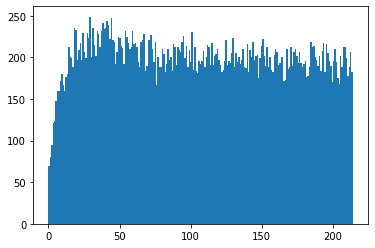

In [177]:
arr1=plt.hist(p2,bins=Nbin)
arr1

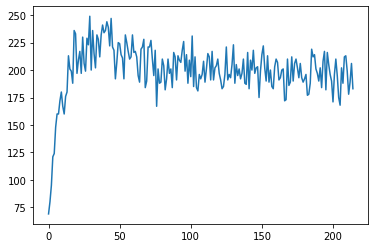

In [178]:
plt.plot(arr1[0])